### 기상자료개방포털(https://data.kma.go.kr)에서 서울 지역 기온데이터 가져오기
1. [기후통계분석]-[통계분석]-[기온분석]에서 서울지역 (1907년 1월 1일 ~ 2023년 04월 11일) 데이터 가져오기
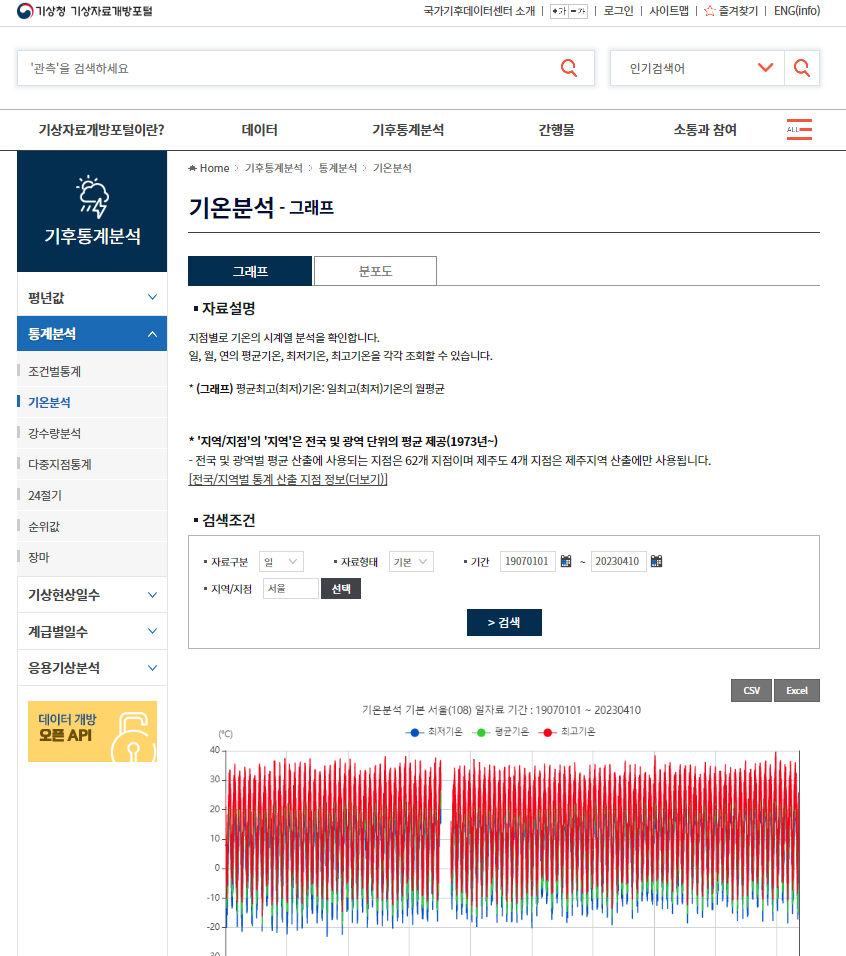

2. csv 파일로 다운로드 (temp_seoul.csv) 후, 불필요한 행(1 ~ 7행) 삭제한 다음 temp_seoul_no.csv로 저장
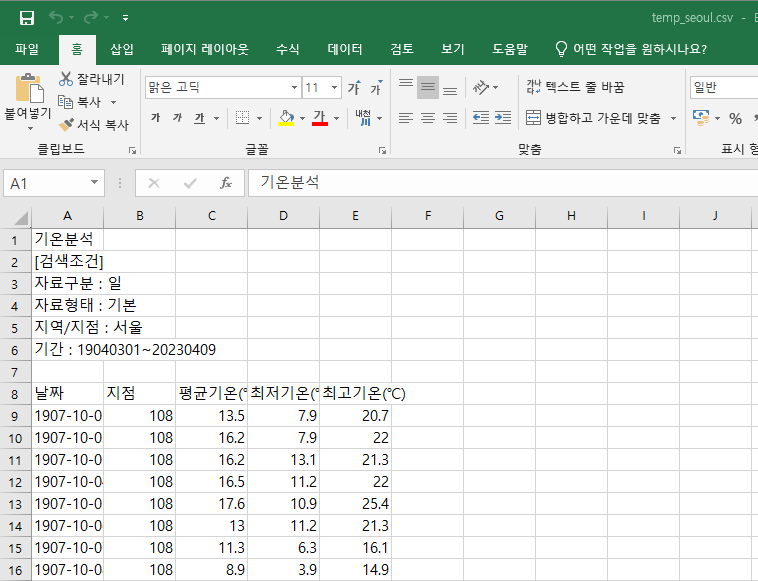

In [3]:
# 기상자료개방포털(https://data.kma.go.kr)사이트의 서울 지역 기온 데이터를 데이터 프레임으로 읽어 들임
import pandas as pd
#temp = pd.read_csv('temp_seoul.csv', encoding='cp949', header=6)
temp = pd.read_csv('ta_20240119085216.csv', encoding='cp949', header=6)
#excel일 경우는 header =7
#temp = pd.read_excel('original.xlsx', header=7) 

In [4]:
# 데이터 형태 확인하기
temp.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3
3,\t1907-10-04,108,16.5,11.2,22.0
4,\t1907-10-05,108,17.6,10.9,25.4


In [5]:
# 데이터 프레임의 각 변수의 타입과 non-Null 데이터 개수 확인
# 평균기온, 최저기온, 최고기온의 경우, 일부 데이터가 결측치임을 확인
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42048 entries, 0 to 42047
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       42048 non-null  object 
 1   지점       42048 non-null  int64  
 2   평균기온(℃)  41292 non-null  float64
 3   최저기온(℃)  41289 non-null  float64
 4   최고기온(℃)  41289 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [6]:
# 변수(컬럼)의 이름 확인(변수 이름이 한글명)
temp.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [7]:
# 3번째 변수 이름 출력
temp.columns[2]

'평균기온(℃)'

In [8]:
# 3번째 변수 값이 NULL인 값의 개수 출력
temp[temp.columns[2]].isna().sum()

756

In [9]:
# temp 데이터 프레임에 파생 변수 등을 추가하기 위한 작업용 데이터 프레임 temp_new 생성
temp_new = temp.copy()

In [10]:
temp_new.head(3)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3


In [11]:
# 변수 이름 '평균기온(℃)'를 'temp_mean'으로 변경
temp_new = temp_new.rename(columns= {temp_new.columns[2]: 'temp_mean'})

In [12]:
# 변수 이름 '최저기온(℃)'를 'temp_min'으로 변경
temp_new = temp_new.rename(columns= {temp_new.columns[3]: 'temp_min'})

In [13]:
# 변수 이름 '최고기온(℃)'를 'temp_max'로 변경
temp_new = temp_new.rename(columns= {temp_new.columns[4]: 'temp_max'})

In [14]:
# 변수 이름 변경 확인
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3
3,\t1907-10-04,108,16.5,11.2,22.0
4,\t1907-10-05,108,17.6,10.9,25.4


In [15]:
# 변수 이름 변경 확인
temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42048 entries, 0 to 42047
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         42048 non-null  object 
 1   지점         42048 non-null  int64  
 2   temp_mean  41292 non-null  float64
 3   temp_min   41289 non-null  float64
 4   temp_max   41289 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [16]:
# 서울지역 역대 최고 기온 확인하기
temp_new[['temp_max']].max()

temp_max    39.6
dtype: float64

In [17]:
# 서울지역 역대 최고 기온인 날짜 확인하기
temp_new.query('temp_max == 39.6')

,날짜,지점,temp_mean,temp_min,temp_max
40051,\t2018-08-01,108,33.6,27.8,39.6


In [18]:
# 날짜 변수 값이 '\t'으로 시작하는 것을 확인
# 날짜 변수 값에서 '\t'를 삭제함
# (주의) ''  공백이 없음
temp_new['날짜'] = temp_new['날짜'].str.replace('\t', '')

In [19]:
# 날짜 변수 값에서 '\t'가 삭제된 것을 확인
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [20]:
# 변수 '날짜'의 데이터 타입이 object인 것을 확인
temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42048 entries, 0 to 42047
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         42048 non-null  object 
 1   지점         42048 non-null  int64  
 2   temp_mean  41292 non-null  float64
 3   temp_min   41289 non-null  float64
 4   temp_max   41289 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [21]:
# 변수 '날짜'의 데이터 타입을 datetime을 변경
temp_new['날짜1'] = pd.to_datetime(temp_new['날짜'])

In [22]:
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max,날짜1
0,1907-10-01,108,13.5,7.9,20.7,1907-10-01
1,1907-10-02,108,16.2,7.9,22.0,1907-10-02
2,1907-10-03,108,16.2,13.1,21.3,1907-10-03
3,1907-10-04,108,16.5,11.2,22.0,1907-10-04
4,1907-10-05,108,17.6,10.9,25.4,1907-10-05


In [23]:
temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42048 entries, 0 to 42047
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   날짜         42048 non-null  object        
 1   지점         42048 non-null  int64         
 2   temp_mean  41292 non-null  float64       
 3   temp_min   41289 non-null  float64       
 4   temp_max   41289 non-null  float64       
 5   날짜1        42048 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.9+ MB


## 일교차(일별 온도차) 구하기
1. 일교차를 구하여 파생변수 diff로 생성

In [25]:
# 일교차를 구하고, 파생변수 diff로 생성
temp_new['diff'] = temp_new['temp_max'] - temp_new['temp_min']

In [26]:
# 일교차 파생변수 diff 값 확인
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max,날짜1,diff
0,1907-10-01,108,13.5,7.9,20.7,1907-10-01,12.8
1,1907-10-02,108,16.2,7.9,22.0,1907-10-02,14.1
2,1907-10-03,108,16.2,13.1,21.3,1907-10-03,8.2
3,1907-10-04,108,16.5,11.2,22.0,1907-10-04,10.8
4,1907-10-05,108,17.6,10.9,25.4,1907-10-05,14.5


> Q1 : 역대 일교차가 가장 컸던 날의 일교차는 ?

In [28]:
# 일교차 파생변수 diff 값 확인
temp_new.sort_values('diff', ascending=False).head(10)

,날짜,지점,temp_mean,temp_min,temp_max,날짜1,diff
12619,1942-04-19,108,12.7,2.5,24.3,1942-04-19,21.8
3863,1918-04-29,108,16.7,4.6,26.3,1918-04-29,21.7
3147,1916-05-13,108,18.1,8.3,29.7,1916-05-13,21.4
13980,1946-01-09,108,-8.1,-13.6,7.7,1946-01-09,21.3
6026,1924-03-31,108,9.0,-1.0,20.2,1924-03-31,21.2
7696,1928-10-26,108,14.3,4.5,25.7,1928-10-26,21.2
559,1909-04-12,108,11.1,-0.9,20.2,1909-04-12,21.1
3545,1917-06-15,108,23.8,13.5,34.5,1917-06-15,21.0
2062,1913-05-24,108,19.7,9.2,30.0,1913-05-24,20.8
11513,1939-04-09,108,10.6,0.6,21.4,1939-04-09,20.8


## 날짜를 년(year), 월(month), 일(day)로 나누기
1. 날짜를 년(year), 월(month), 일(day)로 나누어 파생 변수로 만들어 저장

In [30]:
# 날짜에서 년(year)을 구하여 파생 변수 year로 만들어 저장
temp_new['year'] = temp_new['날짜1'].dt.year

In [31]:
# 날짜에서 월(month)을 구하여 파생 변수 month로 만들어 저장
temp_new['month'] = temp_new['날짜1'].dt.month

In [32]:
# 날짜에서 일(day)을 구하여 파생 변수 day로 만들어 저장
temp_new['day'] = temp_new['날짜1'].dt.day

In [33]:
# 파생변수 year, month, day 확인
temp_new.head()

,날짜,지점,temp_mean,temp_min,temp_max,날짜1,diff,year,month,day
0,1907-10-01,108,13.5,7.9,20.7,1907-10-01,12.8,1907,10,1
1,1907-10-02,108,16.2,7.9,22.0,1907-10-02,14.1,1907,10,2
2,1907-10-03,108,16.2,13.1,21.3,1907-10-03,8.2,1907,10,3
3,1907-10-04,108,16.5,11.2,22.0,1907-10-04,10.8,1907,10,4
4,1907-10-05,108,17.6,10.9,25.4,1907-10-05,14.5,1907,10,5


In [34]:
# 데이터 프레임 temp_new에서 결측치 개수 확인
pd.isna(temp_new).sum()

날짜             0
지점             0
temp_mean    756
temp_min     759
temp_max     759
날짜1            0
diff         760
year           0
month          0
day            0
dtype: int64

In [35]:
# 데이터 프레임 temp_new에서 변수 'temp_mean', 'temp_min', 'temp_max' 결측치 제거
temp_new = temp_new.dropna(subset = ['temp_mean', 'temp_min', 'temp_max'])

In [36]:
# 데이터 프레임 temp_new에서 결측치 개수 확인
pd.isna(temp_new).sum()

날짜           0
지점           0
temp_mean    0
temp_min     0
temp_max     0
날짜1          0
diff         0
year         0
month        0
day          0
dtype: int64

> Q : 월별 평균 일교차가 큰 달을 알아보기 

In [38]:
# 월별 평균 일교차가 큰 달을 알아보기 
temp_new.groupby('month')\
        .agg(diff_mean = ('diff', 'mean')) \
        .sort_values('diff_mean', ascending=False)

,diff_mean
month,
10,10.854927
5,10.841079
4,10.810531
6,9.707965
3,9.609164
9,9.446339
11,9.398555
2,8.874397
1,8.429395


> Q : 월별 평균 기온 알아보기 

In [40]:
temp_new.groupby('month') \
        .agg(mean_temp = ('temp_mean', 'mean'))

,mean_temp
month,
1,-3.514257
2,-0.902883
3,4.559349
4,11.487699
5,17.034513
6,21.555310
7,24.826492
8,25.568704
9,20.668423


> Q : 역대 1월 평균 기온 변화를 알아보기

In [42]:
# 1월 기온만 추출하기
temp_jan = temp_new.query('month == 1.0')
temp_jan

,날짜,지점,temp_mean,temp_min,temp_max,날짜1,diff,year,month,day
92,1908-01-01,108,-5.9,-9.1,-1.3,1908-01-01,7.8,1908,1,1
93,1908-01-02,108,-7.7,-13.9,-3.0,1908-01-02,10.9,1908,1,2
94,1908-01-03,108,-6.2,-10.8,-2.9,1908-01-03,7.9,1908,1,3
95,1908-01-04,108,-7.5,-12.8,-1.7,1908-01-04,11.1,1908,1,4
96,1908-01-05,108,-4.8,-11.3,-0.1,1908-01-05,11.2,1908,1,5
...,...,...,...,...,...,...,...,...,...,...
42043,2024-01-14,108,-0.6,-3.3,2.4,2024-01-14,5.7,2024,1,14
42044,2024-01-15,108,-3.7,-6.9,0.9,2024-01-15,7.8,2024,1,15
42045,2024-01-16,108,-2.1,-7.2,4.3,2024-01-16,11.5,2024,1,16
42046,2024-01-17,108,0.6,-2.3,1.9,2024-01-17,4.2,2024,1,17


In [43]:
# 년도별 1월 평균 기온 출력하기
mean_temp_jan = temp_jan.groupby('year', as_index = False) \
        .agg(mean_temp_jan  = ('temp_mean', 'mean'))
mean_temp_jan.head(10)                  

,year,mean_temp_jan
0,1908,-3.464516
1,1909,-2.509677
2,1910,-2.258065
3,1911,-4.961290
4,1912,-4.687097
5,1913,-5.096774
6,1914,-2.212903
7,1915,-3.938710
8,1916,-0.009677
9,1917,-8.964516


<Axes: xlabel='year'>

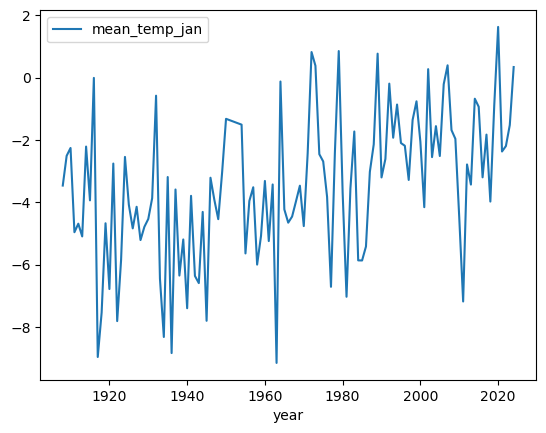

In [44]:
# 년도별 1월 평균 기온은 라인 그래프로 출력하기
mean_temp_jan.plot.line(x='year' , y ='mean_temp_jan')

<Axes: xlabel='year', ylabel='mean_temp_jan'>

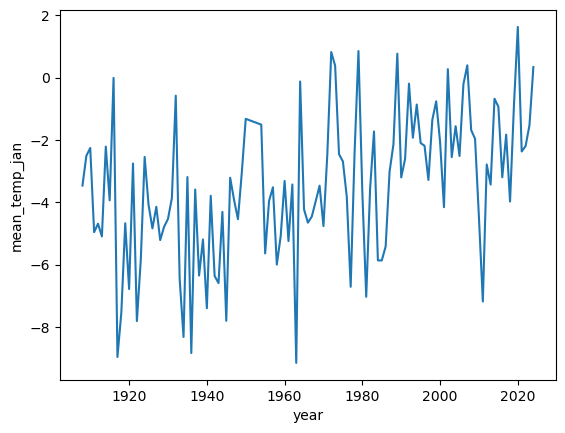

In [45]:
import seaborn as sns
#sns.lineplot(data=mean_temp_jan, x=mean_temp_jan['year'], y = mean_temp_jan['mean_temp_jan'])
sns.lineplot(data=mean_temp_jan, x='year', y = 'mean_temp_jan')